In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [2]:
# Load the dataset
file_path = r"D:\HRISHABH\Mentorness internship\task3\Dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print("\nBasic information:")
print(df.info())
print("\nMissing values in each column:")
print(df.isnull().sum())
print("\nSummary statistics of numerical columns:")
print(df.describe())
print("\nSummary statistics of categorical columns:")
print(df.describe(include=['O']))


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

**Handling missing values**

In [3]:
# Fill missing 'Cuisines' with a placeholder 'Unknown'
df['Cuisines'].fillna('Unknown', inplace=True)

# Verify that there are no missing values
print("\nMissing values after handling:")
print(df.isnull().sum())

# **Convert categorical variables into numerical values**

# For binary categories
binary_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# For multi-category variables using One-Hot Encoding
df = pd.get_dummies(df, columns=['Cuisines', 'Currency', 'Rating color', 'Rating text'], drop_first=True)

# Convert 'Country Code' to categorical
df['Country Code'] = df['Country Code'].astype('category')

# Feature Engineering 
# Example: Create a 'Cost per Vote' feature
df['Cost per Vote'] = df['Average Cost for two'] / (df['Votes'] + 1)  

# Drop unnecessary columns
columns_to_drop = ['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude']
df.drop(columns=columns_to_drop, inplace=True)
print("\nFirst few rows of the cleaned dataset:")
print(df.head())
print("\nBasic information about the cleaned dataset:")
print(df.info())


Missing values after handling:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

First few rows of the cleaned dataset:
  Country Code  Average Cost for two  Has Table booking  Has Online delivery  \
0          162                  1100                  1                    0   
1          162                  1200                  1                    0   
2          162                  4000                  1                    0   
3          162                  1500             

C:\Users\user\AppData\Local\Temp\ipykernel_36928\3748601506.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cuisines'].fillna('Unknown', inplace=True)


In [4]:
# Separate features and target variable
X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List numerical columns
numerical_features = ['Average Cost for two', 'Votes', 'Cost per Vote']  # Modify as needed

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform the testing data
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Verify the shape of the processed data
print(f"Shape of training data: {X_train.shape}")
print(f"Shape of testing data: {X_test.shape}")


Shape of training data: (7640, 1855)
Shape of testing data: (1911, 1855)


In [5]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_model.predict(X_test)



**Evaluation**

Model Performance:
  MAE: 0.1169
  MSE: 0.0313
  R²: 0.9862


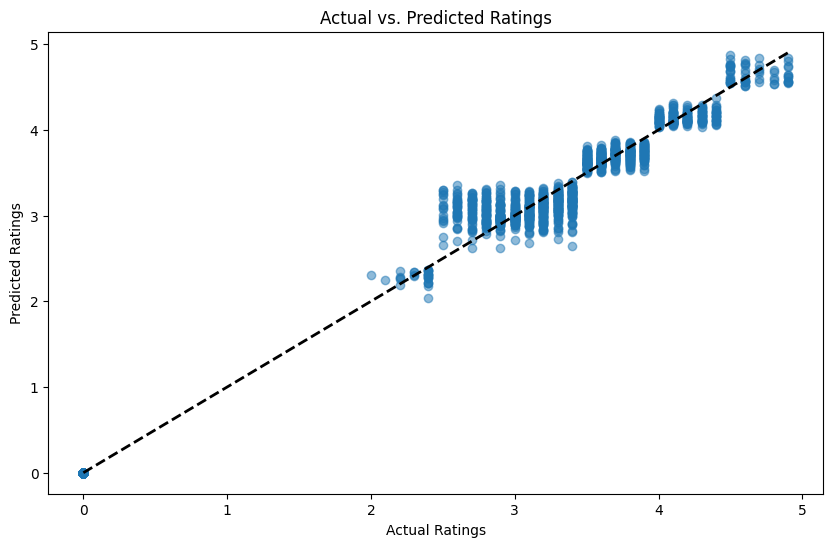

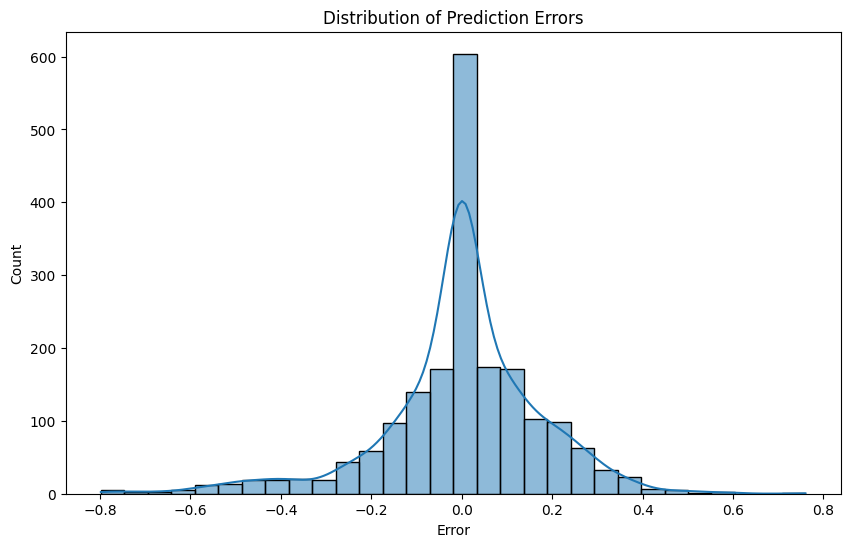

In [6]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"  MAE: {mae:.4f}")
print(f"  MSE: {mse:.4f}")
print(f"  R²: {r2:.4f}")

# Visualization: Actual vs. Predicted Ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# Visualization: Distribution of Errors
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel('Error')
plt.title('Distribution of Prediction Errors')
plt.show()

In [9]:
def preprocess_sample_input(input_data, feature_names):
    # Convert the sample input into a DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Fill missing values
    input_df['Cuisines'] = input_df['Cuisines'].fillna('Unknown')
    
    # Encode categorical features
    input_df = pd.get_dummies(input_df, drop_first=True)
    
    # Create a DataFrame with all the columns as in training data
    all_features = pd.DataFrame(columns=feature_names)
    # Add the sample input to this DataFrame
    all_features = pd.concat([all_features, input_df], ignore_index=True, sort=False)
    
    # Reindex to ensure all columns are in the same order as in the training set
    all_features = all_features.reindex(columns=feature_names, fill_value=0)
    
    return all_features

def predict_rating(model, sample_input, feature_names):
    # Preprocess the input
    processed_input = preprocess_sample_input(sample_input, feature_names)
    
    # Make a prediction
    prediction = model.predict(processed_input)
    return prediction[0]

# Example usage
if __name__ == "__main__":
    # Initialize and train the Random Forest model (assumed to be done already)
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)  # Training the model
    
    # Feature names used in training
    feature_names = X_train.columns
    
    # Sample input data
    sample_input = {
        'Country Code': 162,
        'Average Cost for two': 2000,
        'Has Table booking': 1,  # Yes
        'Has Online delivery': 1,  # Yes
        'Is delivering now': 1,  # Yes
        'Switch to order menu': 0,  # No
        'Price range': 3,
        'Cuisines': 'Japanese, Sushi'
    }
    
    # Predict rating for the sample input
    predicted_rating = predict_rating(rf_model, sample_input, feature_names)
    print(f"The predicted rating for the sample restaurant is: {predicted_rating:.2f}")

The predicted rating for the sample restaurant is: 3.26
